\section{1D free fermions}
Spinless free fermions on a lattice can be written as
\begin{equation}
  H_{0}=-t\sum_{\langle{ij}\rangle}(c_{i}^{\dagger}c_{j}+h.c.),
 \label{<+label+>}
\end{equation}
where $\{c_{i}^{\dagger}, c_{j}\}=\delta_{i,j}$. In the first place, let us consider the simplest lattice, namely a one dimensional bipartite ring with $L$ (even) sites. With periodic boundary condition (PBC), by a discrete Fourier transformation
\begin{equation}
 c_{j}=\frac{1}{\sqrt{L}}\sum_{k}e^{\text{i}kj}c_{k},
\label{}
\end{equation}
with the quantization condition imposed by the boundary condition. Then the Hamiltonian becomes

\begin{equation}
H_{0}=-t\sum_{k}(2\cos{k})c_{k}^{\dagger}c_{k}.
\label{}
\end{equation}
suppose there are $N, (N \leq L)$ fermions in the system.

\subsection{Ground state}
The ground state is simply the one in which the lowest $N$ orbitals are occupied. Different boundary conditions also impose different quantization conditions of $k$, for examples,
\begin{itemize}
\item \textbf{Periodic boundary condition} (PBC). $kL=2n\pi, n\in{Z}$. If $N$ is even, there is a \textbf{two-fold ground state degeneracy}. Otherwise not.
\item \textbf{Anti-periodic boundary condition} (APBC). $kL=(2n+1)\pi, n\in{Z}$. If $N$ is odd, there is a two-fold ground state degeneracy. Otherwise not.
\end{itemize}

For two pieces of free fermions $\sigma=\uparrow, \downarrow$, they have no interactions and can be treated separately as $H_{0}=-t\sum_{k}(2\cos{k})c_{k}^{\dagger}c_{k}-t\sum_{k{'}}(2\cos{k{'}})c_{k{'}}^{\dagger}c_{k{'}}$. On a bipartite lattice with PBC, we can expect a four-fold degeneracy at most in terms of the spin-$1/2$ free fermion model.



In [246]:
# Compute partition function.
from numpy import linalg as la

def LoadHam (f):
    rawData = np.fromfile (f, dtype=np.float)
#     print (rawData.size)
    d = int (np.sqrt (rawData.size / 2))
    temp = np.reshape (rawData, (d, d, 2))
    ham = np.array (temp[..., 0], dtype=complex)
    ham.imag = temp[..., 1]
    return d, np.transpose (ham)

def PartitionFunction (beta, ham):
    w, v = la.eigh (ham)
    p = []
    for i in range (dim):
        p = np.append (p, np.exp (-1.0*beta*(w[i])))
    return np.sum (p)

def InternalEnergy (beta, ham):
    w, v = la.eigh (ham)
    p = []
    for i in range (dim):
        p = np.append (p, np.exp (-1.0*beta*(w[i])))
    e = np.dot (w, p) / np.sum (p)
    return e


ham0File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u0.0_filling0201_phi0.0.dat'
ham1File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u0.0_filling0201_phi2.04.dat'

dim, ham0 = LoadHam (ham0File)
dim, ham1 = LoadHam (ham1File)

w, v = la.eigh (ham0)
print (w[:10])
w, v = la.eigh (ham1)
print(w[:10])

print ('Partiton function ', PartitionFunction (1.0, ham0))
print ('Partiton function ', PartitionFunction (1.0, ham1))

[-5.41421356 -5.41421356 -4.82842712 -4.82842712 -4.82842712 -4.82842712
 -4.82842712 -4.24264069 -4.24264069 -4.        ]
[-5.5958653  -5.38650071 -4.88105284 -4.67168825 -4.67168825 -4.67168825
 -4.46232366 -4.375602   -4.16623741 -4.16623741]
Partiton function  2206.878362686819
Partiton function  2208.6691190386664


In [6]:
# print(InternalEnergy(beta, ham0)-InternalEnergy(beta, ham1))

figFE = plt.figure(figsize=(8, 4))
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

N = 40
x = np.linspace(0.0, 1.0, num=N, endpoint=False)

ham0File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u0.0_filling0201_phi0.0.dat'
ham1File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u0.0_filling0201_phi2.04.dat'
ham2File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u10.0_filling0201_phi0.0.dat'
ham3File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u10.0_filling0201_phi2.04.dat'
dim, ham0 = LoadHam (ham0File)
dim, ham1 = LoadHam (ham1File)
dim, ham2 = LoadHam (ham2File)
dim, ham3 = LoadHam (ham3File)

y0 = []
for i in range(N):
    delta = InternalEnergy(x[i], ham0)-InternalEnergy(x[i], ham1)
#     print (delta)
    y0 = np.append (y0, delta)    
y1 = []
for i in range(N):
    delta = InternalEnergy(x[i], ham2)-InternalEnergy(x[i], ham3)
#     print (delta)
    y1 = np.append (y1, delta)

ax0 = figFE.add_subplot(121)
ax0.set_title(r'(a) Filling=0201', fontsize=fsize)
ax0.set_xlim(0.0, 1.0)
ax0.plot(x, y0, color='navy', linewidth=0.5, marker='.', label='$U/t=0.0$')
ax0.plot(x, y1, color='m', linewidth=0.5, marker='>', markersize=3, label='$U/t=10.0$')

ax0.tick_params (axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel ('$\\beta$', fontsize=fsize)
ax0.set_ylabel ('$\Delta E$', fontsize=fsize)
ax0.ticklabel_format (style='sci', axis='y', scilimits=(0, 0))
ax0.legend (frameon=False, fontsize=fsize)

#########

ham0File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u0.0_filling0202_phi0.0.dat'
ham1File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u0.0_filling0202_phi1.0.dat'
ham2File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u10.0_filling0202_phi0.0.dat'
ham3File = '/Users/wayne/Downloads/data/hubbard/ham_lattice0801PO_u10.0_filling0202_phi1.0.dat'
dim, ham0 = LoadHam (ham0File)
dim, ham1 = LoadHam (ham1File)
dim, ham2 = LoadHam (ham2File)
dim, ham3 = LoadHam (ham3File)

y0 = []
for i in range(N):
    delta = InternalEnergy(x[i], ham0)-InternalEnergy(x[i], ham1)
    y0 = np.append (y0, delta)    
y1 = []
for i in range(N):
    delta = InternalEnergy(x[i], ham2)-InternalEnergy(x[i], ham3)
    y1 = np.append (y1, delta)
    
ax1 = figFE.add_subplot(122, sharey=ax0)
ax1.set_title(r'(b) Filling=0202', fontsize=fsize)
ax1.set_xlim(0.0, 1.0)
ax1.plot(x, y0, color='navy', linewidth=0.5, marker='.', label='$U/t=0.0$')
ax1.plot(x, y1, color='m', linewidth=0.5, marker='>', markersize=3, label='$U/t=10.0$')

ax1.tick_params (axis='both', labelsize=fsize, direction='in')
ax1.set_xlabel ('$\\beta$', fontsize=fsize)
# ax1.set_ylabel ('$\Delta E$', fontsize=fsize)
ax1.axes.get_yaxis().set_visible(False)
ax1.ticklabel_format (style='sci', axis='y', scilimits=(0, 0))
ax1.legend (frameon=False, fontsize=fsize)

figFE.tight_layout()
figFE.savefig('energy_temperature_1D.pdf', format='PDF')

ValueError: cannot reshape array of size 100352 into shape (100,20000)

<Figure size 576x288 with 0 Axes>

<IPython.core.display.Javascript object>


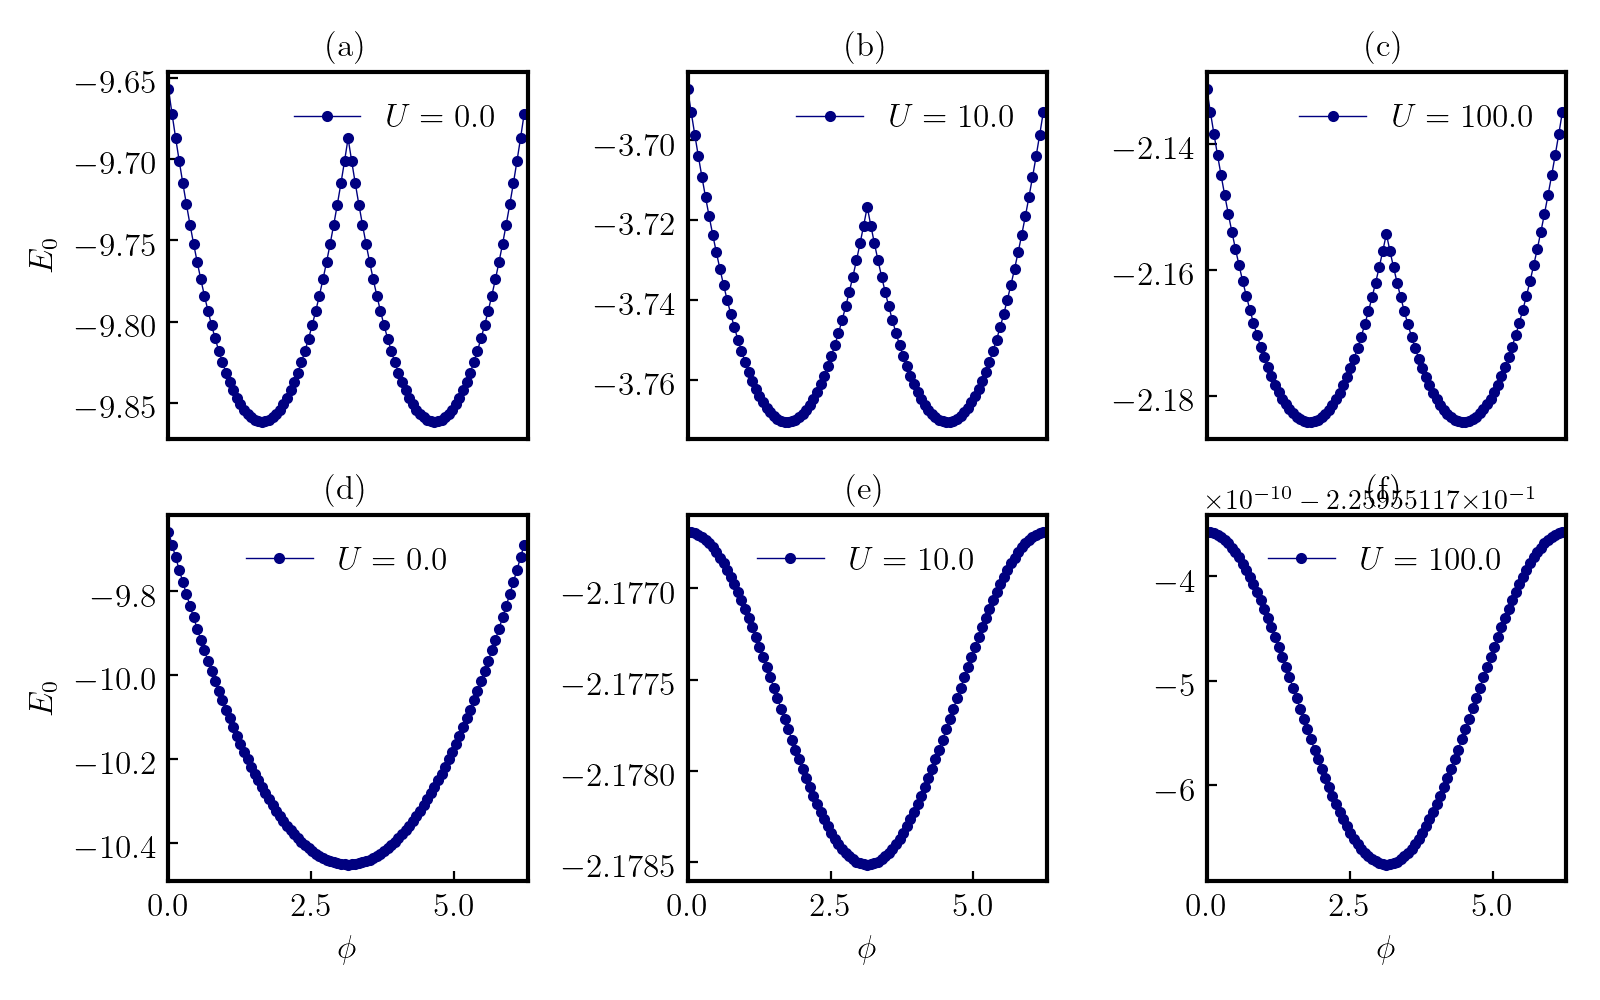

26
28
29
49
49
49


In [155]:
def LoadEigVal(f):
    rawData = np.fromfile(f, dtype=np.float)
#     print(rawData.size)
    eigVal = np.reshape(rawData, (numSam, numEval))
    return eigVal

numSite = 8
numSam = 100
numEval = 10

fig1DEne = plt.figure(figsize=(8, 5))
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 12
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(0.0, 2.0*PI, num=numSam, endpoint=False)

##########

# eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u0.0_filling0201_phiNum100.dat'
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u0.0_filling0403_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
y = []
for i in range (numSam):
    y.append (spec0[i][0])
print (y.index (np.min (y[:int (numSam/2)])))

ax0 = fig1DEne.add_subplot(2, 3, 1)
ax0.set_title(r'(a)', fontsize=fsize)
ax0.set_xlim(0.0, 2.0*PI)
ax0.plot(x, spec0[:, 0], color='navy', linewidth=0.5, marker='.', label='$U=0.0$')

ax0.tick_params(axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel('$\Phi$', fontsize=fsize)
ax0.axes.get_xaxis().set_visible(False)
ax0.set_ylabel('$E_{0}$', fontsize=fsize)
ax0.legend(frameon=False, fontsize=fsize)

##########

# eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u10.0_filling0201_phiNum100.dat'
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u10.0_filling0403_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
y = []
for i in range (numSam):
    y.append (spec0[i][0])
print (y.index (np.min (y[:int (numSam/2)])))

ax1 = fig1DEne.add_subplot(2, 3, 2)
ax1.set_title(r'(b) ', fontsize=fsize)
ax1.set_xlim(0.0, 2.0*PI)
ax1.plot(x, spec0[:, 0], color='navy', linewidth=0.5, marker='.', label='$U=10.0$')

ax1.tick_params(axis='both', labelsize=fsize, direction='in')
ax1.set_xlabel('$\Phi$', fontsize=fsize)
ax1.axes.get_xaxis().set_visible(False)
ax1.legend(frameon=False, fontsize=fsize)

##########

# eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u100.0_filling0201_phiNum100.dat'
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u100.0_filling0403_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
y = []
for i in range (numSam):
    y.append (spec0[i][0])
print (y.index (np.min (y[:int (numSam/2)])))

ax2 = fig1DEne.add_subplot(2, 3, 3)
ax2.set_title(r'(c)', fontsize=fsize)
ax2.set_xlim(0.0, 2.0*PI)
ax2.plot(x, spec0[:, 0], color='navy', linewidth=0.5, marker='.', label='$U=100.0$')

ax2.tick_params(axis='both', labelsize=fsize, direction='in')
ax2.set_xlabel('$\Phi$', fontsize=fsize)
ax2.axes.get_xaxis().set_visible(False)
ax2.legend(frameon=False, fontsize=fsize)

##########

# eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u0.0_filling0202_phiNum100.dat'
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u0.0_filling0404_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
y = []
for i in range (numSam):
    y.append (spec0[i][0])
print (y.index (np.min (y[:int (numSam/2)])))

ax3 = fig1DEne.add_subplot(2, 3, 4)
ax3.set_title(r'(d)', fontsize=fsize)
ax3.set_xlim(0.0, 2.0*PI)
ax3.plot(x, spec0[:, 0], color='navy', linewidth=0.5, marker='.', label='$U=0.0$')

ax3.tick_params(axis='both', labelsize=fsize, direction='in')
ax3.set_xlabel('$\phi$', fontsize=fsize)
# ax3.axes.get_xaxis().set_visible(False)
ax3.set_ylabel('$E_{0}$', fontsize=fsize)
ax3.legend(frameon=False, fontsize=fsize)

##########

# eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u10.0_filling0202_phiNum100.dat'
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u10.0_filling0404_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
y = []
for i in range (numSam):
    y.append (spec0[i][0])
print (y.index (np.min (y[:int (numSam/2)])))

ax4 = fig1DEne.add_subplot(2, 3, 5)
ax4.set_title(r'(e) ', fontsize=fsize)
ax4.set_xlim(0.0, 2.0*PI)
ax4.plot(x, spec0[:, 0], color='navy', linewidth=0.5, marker='.', label='$U=10.0$')

ax4.tick_params(axis='both', labelsize=fsize, direction='in')
ax4.set_xlabel('$\phi$', fontsize=fsize)
# ax4.axes.get_xaxis().set_visible(False)
ax4.legend(frameon=False, fontsize=fsize)

##########

# eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u100.0_filling0202_phiNum100.dat'
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u100.0_filling0404_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
y = []
for i in range (numSam):
    y.append (spec0[i][0])
print (y.index (np.min (y[:int (numSam/2)])))

ax5 = fig1DEne.add_subplot(2, 3, 6)
ax5.set_title(r'(f)', fontsize=fsize)
ax5.set_xlim(0.0, 2.0*PI)
ax5.plot(x, spec0[:, 0], color='navy', linewidth=0.5, marker='.', label='$U=100.0$')

ax5.tick_params(axis='both', labelsize=fsize, direction='in')
ax5.set_xlabel('$\phi$', fontsize=fsize)
# ax5.axes.get_xaxis().set_visible(False)
ax5.legend(frameon=False, fontsize=fsize)

fig1DEne.tight_layout()
fig1DEne.savefig('flux_energy_1D_4443.pdf', format='PDF')

In [132]:
# Lieb Wu solution.
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

U = 0.2

def Energy(x):
    return -4*L*(special.jv(0, x)*special.jv(1, x)) / (x*(1.0+np.exp(x*0.5*U)))

integrate.quad(lambda x: Energy(x), 0, 1000)

(-9.791345879574159, 1.1844645954005553e-07)

\section{Hubbard model in 1D}

<IPython.core.display.Javascript object>


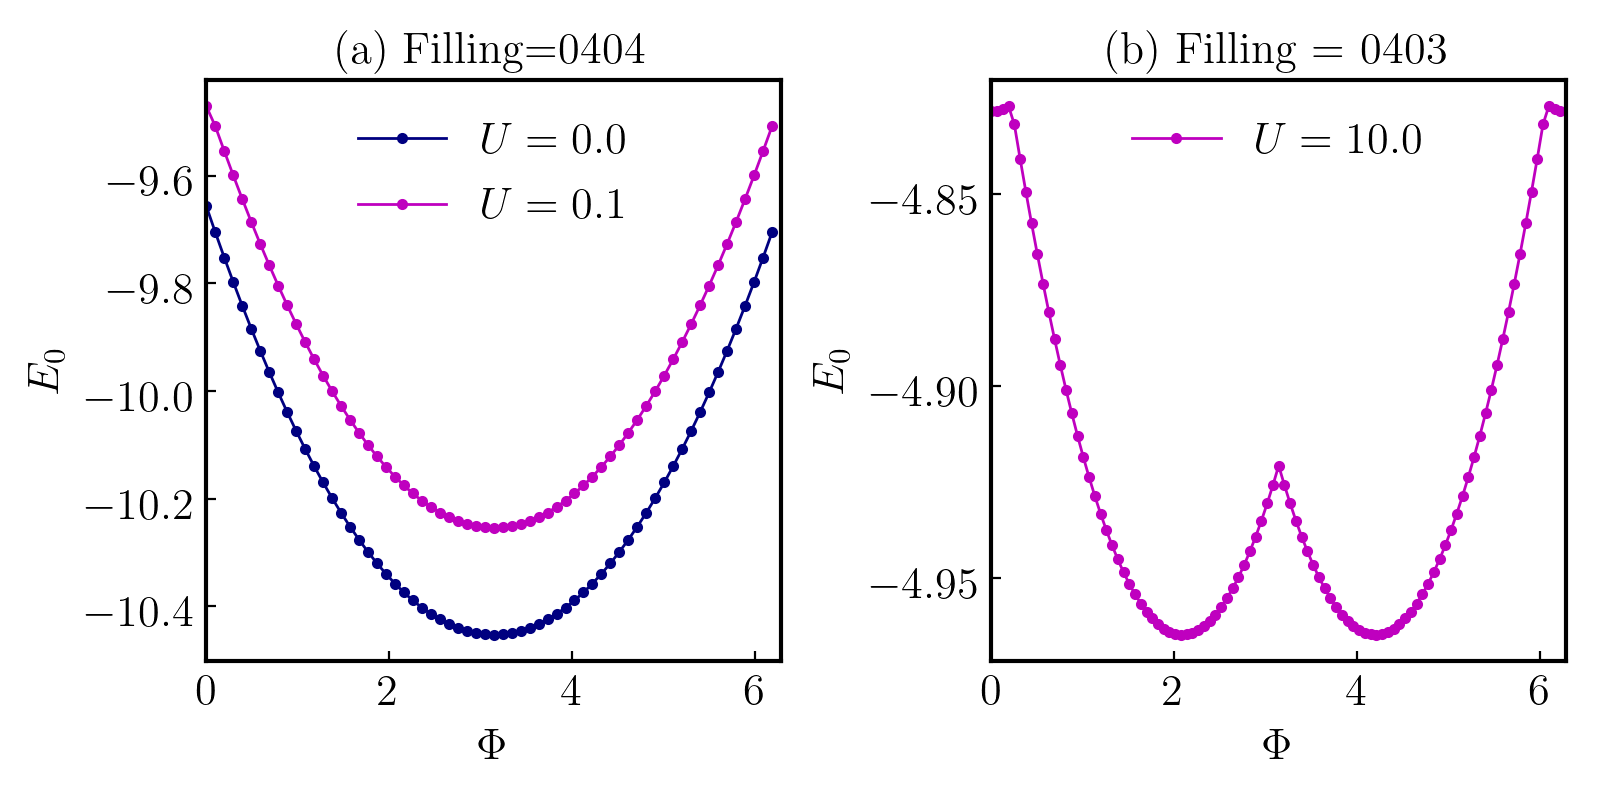

1280
1280
1280
1000
1000


In [171]:
def LoadEigVal(f):
    rawData = np.fromfile(f, dtype=np.float)
    print(rawData.size)
    eigVal = np.reshape(rawData, (numSam, numEval))
    return eigVal

numSite = 8
numSam = 64
numEval = 20

fig1DEne = plt.figure(figsize=(8, 4))
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(0.0, 2.0*PI, num=numSam, endpoint=False)

########## Flux inseration
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u0.0_filling0404_phiNum64.dat'
eigValsFile1 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u0.1_filling0404_phiNum64.dat'
eigValsFile2 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u1.0_filling0404_phiNum64.dat'
eigValsFile3 = '/Users/wayne/Downloads/data/hubbard/eigenvalues20_lattice0801PO_u10.0_filling0404_phiNum64.dat'
spec0 = LoadEigVal(eigValsFile0)
spec1 = LoadEigVal(eigValsFile1)
spec2 = LoadEigVal(eigValsFile2)

ax0 = fig1DEne.add_subplot(121)
ax0.set_title(r'(a) Filling=0404', fontsize=fsize)
ax0.set_xlim(0.0, 2.0*PI)
y0 = spec0[:, 0]
ax0.plot(x, spec0[:, 0], color='navy', linewidth=1.0, marker='.', label='$U=0.0$')
ax0.plot(x, spec1[:, 0], color='m', linewidth=1.0, marker='.', label='$U=0.1$')
# ax0.plot(x, spec2[:, 0], color='green', linewidth=2.0, marker='', label='2')

ax0.tick_params(axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel('$\Phi$', fontsize=fsize)
# ax0.axes.get_xaxis().set_visible(False)
ax0.set_ylabel('$E_{0}$', fontsize=fsize)
ax0.legend(frameon=False, fontsize=fsize)

numSam = 100
numEval = 10

x = np.linspace(0.0, 2.0*PI, num=numSam, endpoint=False)

##########
eigValsFile0 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u0.0_filling0201_phiNum100.dat'
eigValsFile1 = '/Users/wayne/Downloads/data/hubbard/eigenvalues10_lattice0801PO_u10.0_filling0201_phiNum100.dat'
spec0 = LoadEigVal(eigValsFile0)
spec1 = LoadEigVal(eigValsFile1)

ax1 = fig1DEne.add_subplot(122)
ax1.set_title(r'(b) Filling = 0403', fontsize=fsize)
ax1.set_xlim(0.0, 2.0*PI)
# ax1.plot(x, spec0[:, 0], color='navy', linewidth=1.0, marker='.', label='$U=0.0$')
ax1.plot(x, spec1[:, 0], color='m', linewidth=1.0, marker='.', label='$U=10.0$')

ax1.tick_params(axis='both', labelsize=fsize, direction='in')
ax1.set_xlabel('$\Phi$', fontsize=fsize)
# ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('$E_{0}$', fontsize=fsize)
ax1.legend(frameon=False, fontsize=fsize)

fig1DEne.tight_layout()
fig1DEne.savefig('flux_energy_1D.pdf', format='PDF')

\section{Electron interaction}

When the simplest on-site interaction is turned on such as
\begin{equation}\label{eq:}
H_{1} = U\sum_{i}n_{i\uparrow}n_{i\downarrow}
\end{equation}
we have the Hamiltonian of Hubbard model $H=H_{0}+H_{1}$. The two pieces get involved. It is quite interesting and general to ask how will the interaction affects on the properties of free fermions. In 1D, the theory of Luttinger liquid has been extensively studied.

\subsection{Lieb-Wu solution}

The exact solution for 1D half-filed Hubbard model is
\begin{equation}
E_{0}(N/2, N/2)=-4N\int_{0}^{\infty}\frac{J_{0}(\omega)J_{1}(\omega)}{\omega\left(1+e^{\omega U/2}\right)}d\omega
\end{equation}
where $J_{0, 1}$ are the Bessel function of first and second order. Note that it is only valid in the thermodynamic limit as $L \rightarrow \infty$. What's the true nature of ground states with consideration of finite lattice is still unclear.

\subsection{Lieb's theorem on Hubbard model}

For the hall filled Hubbard model, in the limit $U \rightarrow \infty$ Hubbard model is reduced to Heisenberg model. Even for finite $U$, Lieb has proven powerful theorems to state that the ground state property is quite similar to the Heisenberg model. **There is no ground state degeneracy for repulsive half-filled Hubbard model**. That is, even any finite small $U$ can dramatically change the the property of free fermions because we can always expect at most four-fold ground state degeneracy for free fermions on a bipartite lattice. Lieb's theorems tell us that any finite $U$ will destroy the thus ground state degeneracy.

It is quite natural to ask how about the scenario away hall-filling. Nothing like Lieb's theorems tell us the story.

\section{Energy and density}

In [1]:
def LoadEigVal(f):
    rawData = np.fromfile(f, dtype=np.float)
    print(rawData.size)
    eigVal = np.reshape(rawData, (numSam, numEval))
    return eigVal


numSite = 12
numSam = 2
numEval = 10
eigValsFile43 = 'data/eigenvalues10_lattice0602OO_filling0605_U1.0_step1.0_num200.dat'
spec43 = LoadEigVal(eigValsFile43)

numEval = 10
eigValsFile44 = 'data/eigenvalues10_lattice0602OO_filling0606_U1.0_step1.0_num200.dat'
spec44 = LoadEigVal(eigValsFile44)

# print(spec44.shape)
# print(spec44[:, 0])
print(spec43[:, 0])

4000
4000
[-8.71354614 -7.58041592 -6.67663219 -5.97252125 -5.42848474 -5.0057629
 -4.67284108 -4.40635623 -4.18957808 -4.01057726 -3.8607659  -3.73386869
 -3.6252247  -3.53131621 -3.44944801 -3.37752619 -3.31390312 -3.25726713
 -3.20656284 -3.1609327  -3.11967362 -3.08220443 -3.04930419 -3.02068736
 -2.99445351 -2.97033437 -2.94809877 -2.92754658 -2.90850376 -2.89081836
 -2.87435719 -2.85900317 -2.84465297 -2.83121521 -2.81860876 -2.80676148
 -2.795609   -2.78509377 -2.7751642  -2.76577396 -2.75688133 -2.74844866
 -2.74044191 -2.73283025 -2.72558566 -2.71936052 -2.71396308 -2.70883301
 -2.70395231 -2.69930445 -2.69487427 -2.69064785 -2.68661238 -2.68275612
 -2.67906824 -2.67553881 -2.6721587  -2.66891949 -2.66581346 -2.66283352
 -2.65997315 -2.65722639 -2.65458776 -2.65205228 -2.64961542 -2.64727307
 -2.64502153 -2.64285748 -2.64077801 -2.63878054 -2.63686287 -2.6350231
 -2.63325968 -2.63157131 -2.62995695 -2.62841575 -2.62694698 -2.62554993
 -2.62422381 -2.62296762 -2.62178009 -2.620

<IPython.core.display.Javascript object>


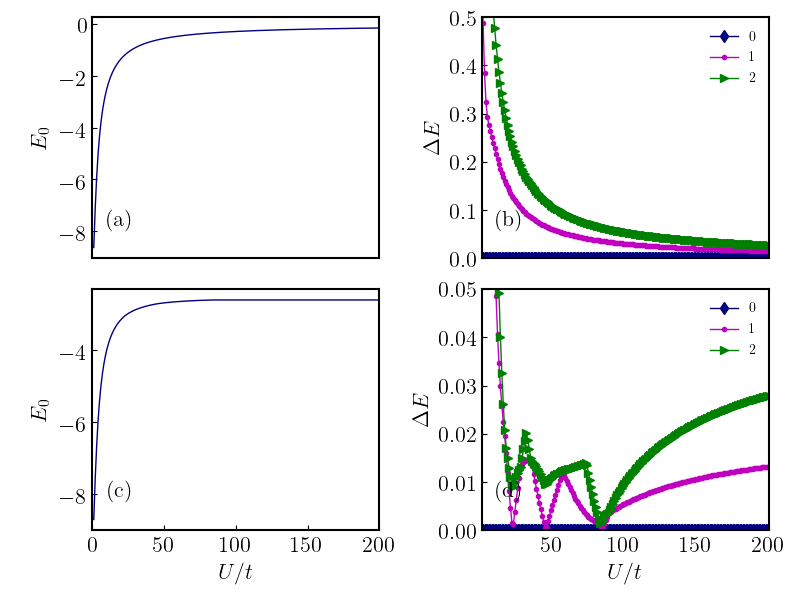

(200,)


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.patches as patches

%matplotlib notebook

figEne = plt.figure(figsize=(8, 6))
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(1, 200, num=numSam, endpoint=True)
print(x.shape)

ax0 = figEne.add_subplot(221)
ax0.set_title(r'(a)', x=0.1, y=0.1, fontsize=fsize)
ax0.set_xlim(0.0, 200.0)
y4 = spec44[:, 0]
ax0.plot(x, y4, color='navy', linewidth=1.0, marker='', label='0')

ax0.tick_params(axis='both', labelsize=fsize, direction='in')
# ax0.set_xlabel('$U/t$', fontsize=fsize)
ax0.axes.get_xaxis().set_visible(False)
ax0.set_ylabel('$E_{0}$', fontsize=fsize)


ax1 = figEne.add_subplot(222)
ax1.set_title(r'(b)', x=0.1, y=0.1, fontsize=fsize)
ax1.set_xlim(1.0, 200.0)
ax1.set_ylim(0.0, 0.5)
y400 = spec44[:, 0]-spec44[:, 0]
y401 = spec44[:, 1]-spec44[:, 0]
y402 = spec44[:, 2]-spec44[:, 0]
ax1.plot(x, y400, color='navy', linewidth=1.0, marker='d', label='0')
ax1.plot(x, y401, color='m', linewidth=1.0, marker='.', label='1')
ax1.plot(x, y402, color='green', linewidth=1.0, marker='>', label='2')
ax1.legend(frameon=False)

ax1.tick_params(axis='both', labelsize=fsize, direction='in')
# ax1.set_xlabel('$U/t$', fontsize=fsize)
ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel(r'$\Delta E$', fontsize=fsize)

##################

ax2 = figEne.add_subplot(223)
ax2.set_title(r'(c)', x=0.1, y=0.1, fontsize=fsize)
ax2.set_xlim(0.0, 200.0)
y3 = spec43[:, 0]
ax2.plot(x, y3, color='navy', linewidth=1.0, marker='', label='0')

ax2.tick_params(axis='both', labelsize=fsize, direction='in')
ax2.set_xlabel('$U/t$', fontsize=fsize)
ax2.set_ylabel('$E_{0}$', fontsize=fsize)

ax3 = figEne.add_subplot(224)
ax3.set_title(r'(d)', x=0.1, y=0.1, fontsize=fsize)
ax3.set_xlim(1.0, 200.0)
ax3.set_ylim(0.0, 0.05)
# x = np.linspace(0, 200, num=100, endpoint=False)
y300 = spec43[:, 0]-spec43[:, 0]
y301 = spec43[:, 1]-spec43[:, 0]
y302 = spec43[:, 2]-spec43[:, 0]
ax3.plot(x, y300, color='navy', linewidth=1.0, marker='d', label='0')
ax3.plot(x, y301, color='m', linewidth=1.0, marker='.', label='1')
ax3.plot(x, y302, color='green', linewidth=1.0, marker='>', label='2')
ax3.legend(frameon=False)

ax3.tick_params(axis='both', labelsize=fsize, direction='in')
ax3.set_xlabel ('$U/t$', fontsize=fsize)
ax3.set_ylabel (r'$\Delta E$', fontsize=fsize)

figEne.tight_layout()
figEne.savefig('energy_lattcie42.pdf', format='PDF')

\section{Density profiles}

In [6]:
eigValsFile33 = 'data/eigenvalues20_lattice0303OO_filling0504_U0.0_step2.0_num100.dat'

spec33 = LoadEigVal(eigValsFile33)

print(spec33.shape)
print(spec33[:, 0])

figEne33 = plt.figure(figsize=(8, 4))
mpl.rcParams['axes.linewidth'] = 1.0
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax0 = figEne33.add_subplot(121)
ax0.set_xlim(0.0, 200.0)
y33 = spec33[:, 0]
ax0.plot(x, y3, color='navy', linewidth=1.0, marker='', label='0')

ax0.tick_params(axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel('$U/t$', fontsize=fsize)
ax0.set_ylabel('$g.s. E$', fontsize=fsize)


ax1 = figEne33.add_subplot(122)
ax1.set_xlim(0.0, 200.0)
ax1.set_ylim(0.0, 0.1)
x = np.linspace(0, 200, num=100, endpoint=False)
y3300 = spec33[:, 0]-spec33[:, 0]
y3301 = spec33[:, 1]-spec33[:, 0]
y3302 = spec33[:, 2]-spec33[:, 0]
ax1.plot(x[1:], y3300[1:], color='navy', linewidth=1.0, marker='d', label='0')
ax1.plot(x[1:], y3301[1:], color='m', linewidth=1.0, marker='.', label='1')
ax1.plot(x[1:], y3302[1:], color='green', linewidth=1.0, marker='>', label='2')
ax1.legend(frameon=False)

ax1.tick_params(axis='both', labelsize=fsize, direction='in')
ax1.set_xlabel('$U/t$', fontsize=fsize)
ax1.set_ylabel(r'$\Delta E$', fontsize=fsize)

figEne33.tight_layout()
figEne33.savefig('energy_lattice0303.pdf', format='PDF')

(100, 20)
[-11.3137085   -7.98647451  -5.77802023  -4.38528695  -3.49114387
  -2.88497156  -2.45161009  -2.12812449  -1.87822786  -1.67978399
  -1.51861106  -1.38524124  -1.27313062  -1.17762082  -1.09531074
  -1.02366209  -0.96074386  -0.905062    -0.85544308  -0.81095312
  -0.7708397   -0.7344901   -0.70140043  -0.67115258  -0.64339677
  -0.61783818  -0.5942266   -0.57234832  -0.55201973  -0.53308219
  -0.51539797  -0.49884688  -0.48332363  -0.46873552  -0.45500068
  -0.44204649  -0.42980834  -0.41822854  -0.40725545  -0.39684266
  -0.38694838  -0.37753487  -0.36856796  -0.36001664  -0.3518527
  -0.34405043  -0.33658634  -0.32943894  -0.3225885   -0.3160169
  -0.30970748  -0.30364487  -0.29781488  -0.29220437  -0.28680119
  -0.28159407  -0.27657253  -0.27172683  -0.2670479   -0.26252728
  -0.25815708  -0.2539299   -0.24983886  -0.24587748  -0.24203969
  -0.23831981  -0.23471248  -0.23121268  -0.22781567  -0.22451699
  -0.22131243  -0.21819802  -0.21517002  -0.21222487  -0.20935923
  

NameError: name 'plt' is not defined

\section{Entanglement}

\subsection{Spin entanglement}
It is quite natural to consider the entanglement of the two branches of fermions in Lieb's representation:
\begin{equation}
    |\psi\rangle=\sum_{ij}w_{ij}|i\rangle_{\uparrow}|j\rangle_{\downarrow}.
\end{equation}

\subsection{Spatial entanglement}
We would like to 


In [144]:
# The returned eigVec[i][j] gives the ith sample's jth eigvector with dimesion dim.
def LoadEigVec(f):
    rawData = np.fromfile(f, dtype=np.float)
    temp = np.reshape(rawData, (numSam, numEval, dim, 2))
    eigVec = np.array(temp[..., 0], dtype=complex)
    eigVec.imag = temp[..., 1]
    return eigVec

def ReshapeWFSpin(wf):
    wfMat = np.zeros((dimUp, dimDown), dtype=complex)
    for l in range(dim):
        i, j = indexDictSpin[l][0], indexDictSpin[l][1]
        wfMat[i][j] = wf[l]
    return np.matrix(wfMat)

def ReshapeWFSpace(wf):
    wfMat = np.zeros((dimL, dimR), dtype=complex)
    for l in range(dim):
        i, j = indexDictSpace[l][0], indexDictSpace[l][1]
        wfMat[i][j] = wf[l]
    return np.matrix(wfMat)

def RedDensityMatrix(WF):
    return WF*(WF.getH())

def EntanglementSpectrum(M):
    es = np.linalg.eigvalsh(M)
    for l in range(len(es)):
        if 0.0 == es[l]:
            es[l] = 1e-99
    return es

def EntanglementEntropySpin(wf):
    wfMat = ReshapeWFSpin(wf)
    Rho = RedDensityMatrix(wfMat)
    es = EntanglementSpectrum(Rho)
    return -1.0*np.dot(es, np.log(np.absolute(es)))

def EntanglementEntropySpace(wf):
    wfMat = ReshapeWFSpace(wf)
    Rho = RedDensityMatrix(wfMat)
    es = EntanglementSpectrum(Rho)
    return -1.0*np.dot(es, np.log(np.absolute(es)))

<IPython.core.display.Javascript object>


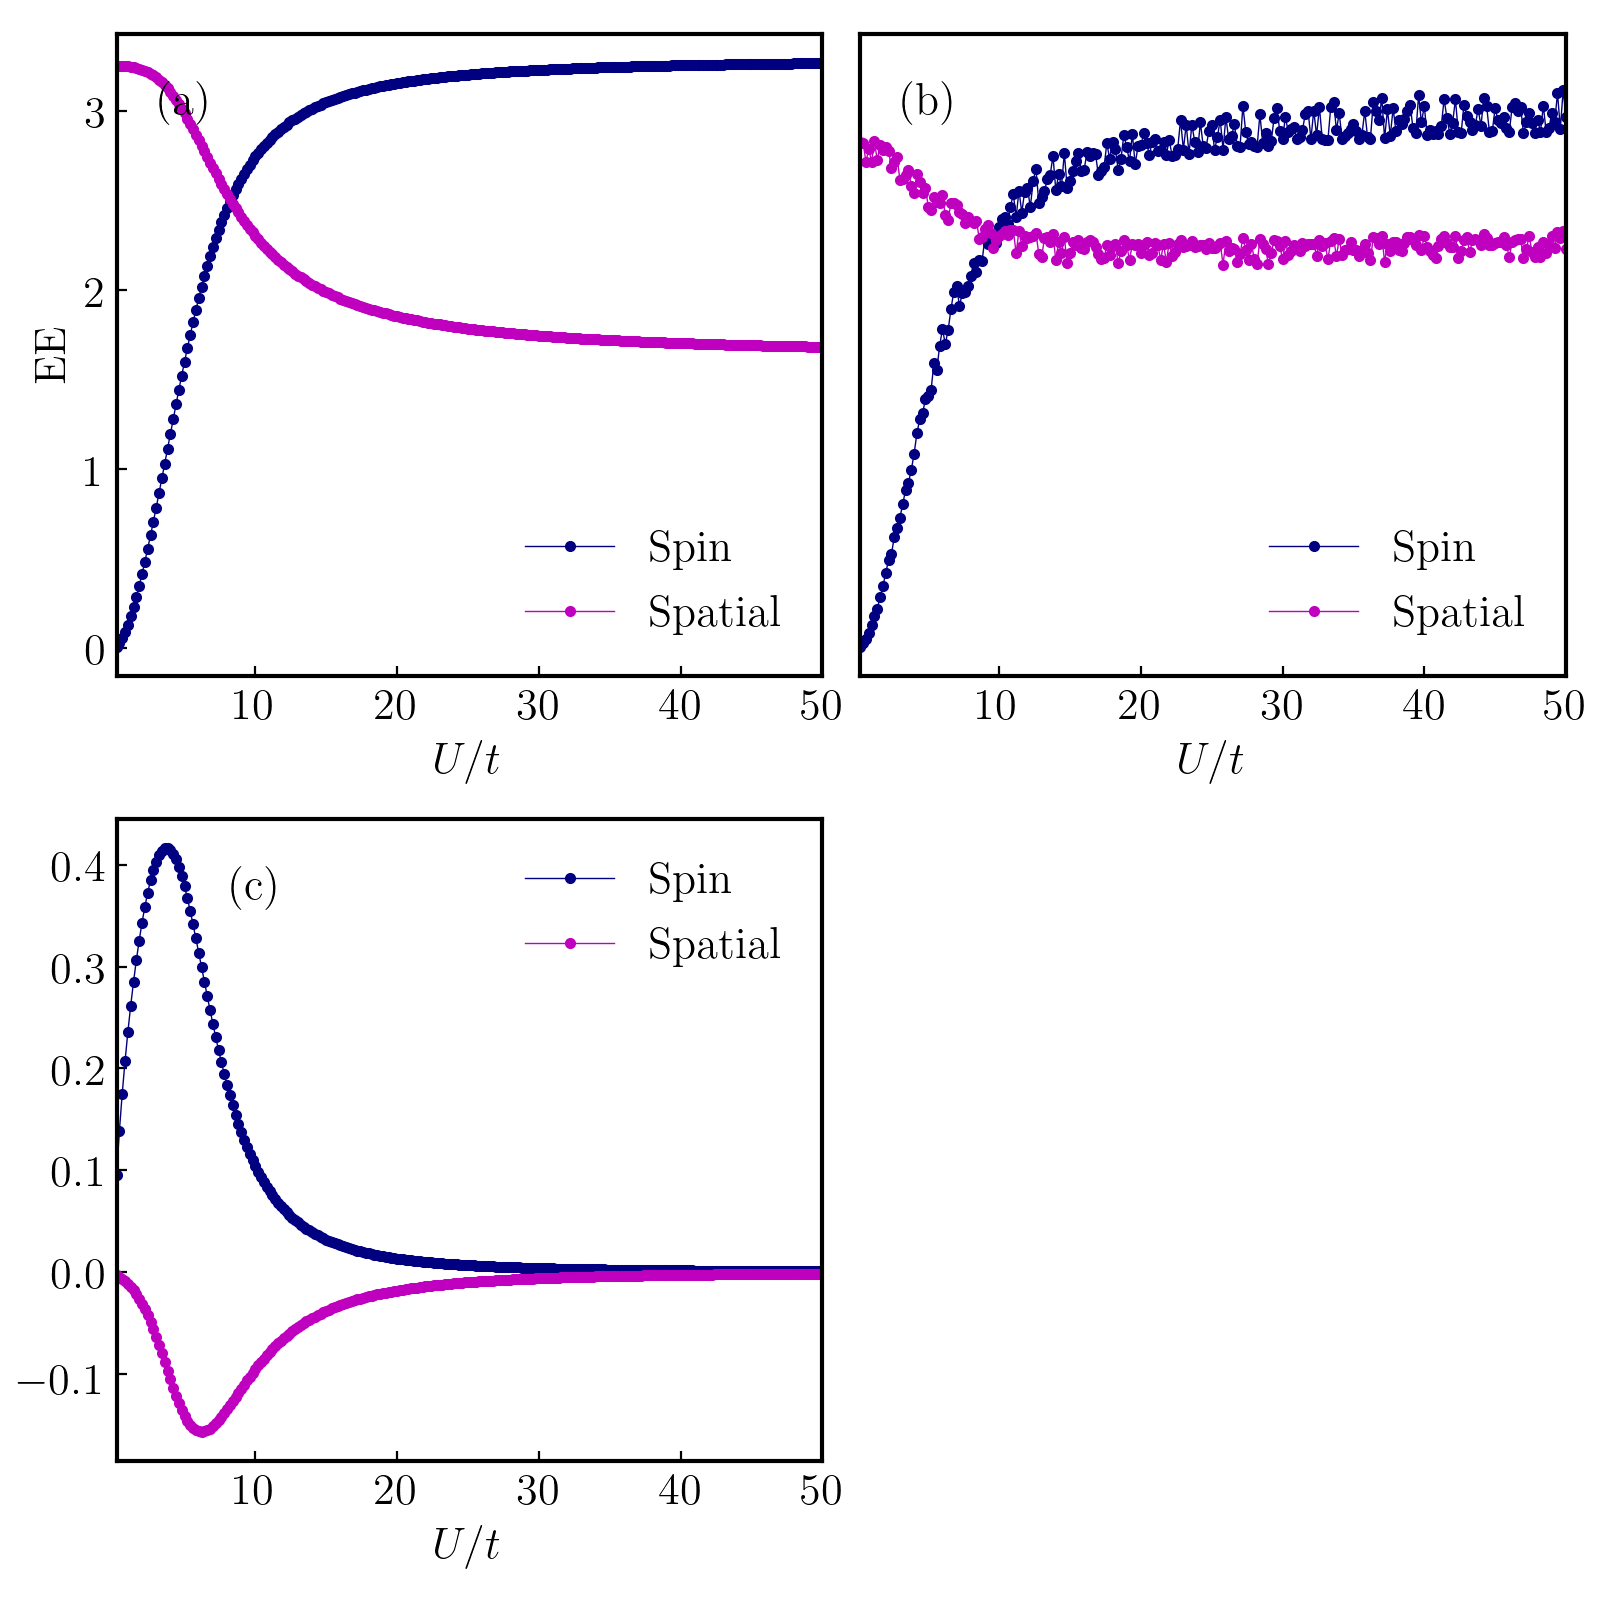

4900
70 70
256 256
3920
70 56
240 240


In [153]:
numSite = 8
numSam = 250
numEval = 20

figEEGs = plt.figure(figsize=(8, 8))
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xStart = 0.2
xEnd = 50.0
x = np.linspace(xStart, xEnd, num=numSam, endpoint=True)

################ begin loading hilbert space
basis = np.genfromtxt('data/hilbert_space_lattice0402OO_filling0404.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

basisUp, basisDown = [], []
indexDictSpin = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configUp, configDown = config[:numSite], config[numSite:]
    if configUp not in basisUp:
        basisUp.append(configUp)
    if configDown not in basisDown:
        basisDown.append(configDown)
    indexDictSpin.append([basisUp.index(configUp), basisDown.index(configDown)])
#     print(basisUp.index(configUp), basisDown.index(configDown), indexDict[i][1])

dimUp, dimDown = len(basisUp), len(basisDown)
print(dimUp, dimDown)

# Spatial entanglement.
basisL, basisR = [], []
indexDictSpace = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configL = config[:int(numSite/2)]+config[numSite:numSite+int(numSite/2)]
    configR = config[int(numSite/2):numSite]+config[numSite+int(numSite/2):]
    if configL not in basisL:
        basisL.append(configL)
    if configR not in basisR:
        basisR.append(configR)
    indexDictSpace.append([basisL.index(configL), basisR.index(configR)])

dimL, dimR = len(basisL), len(basisR)
print(dimL, dimR)
############# end loading hilber space

eigVecFile = 'data/eigenvectors20_lattice0402OO_fluxPI_filling0404_U0.2_step0.2_num250.dat'
waveFunc = LoadEigVec(eigVecFile)

EEGsSpin0 = np.zeros((numSam), dtype=np.float)
EEGsSpace0 = np.zeros((numSam), dtype=np.float)
for l in range(numSam):
    wf = waveFunc[l][0]
    EEGsSpin0[l] = EntanglementEntropySpin(wf)
    EEGsSpace0[l] = EntanglementEntropySpace(wf)

ax0 = figEEGs.add_subplot(221)
ax0.set_title(r'(a)', x=0.1, y=0.85, fontsize=fsize)
ax0.set_xlim(xStart, xEnd)
ax0.plot(x, EEGsSpin0, color='navy', linewidth=0.5, marker='.', label='Spin')
ax0.plot(x, EEGsSpace0, color='m', linewidth=0.5, marker='.', label='Spatial')
ax0.legend(frameon=False, fontsize=fsize)

ax0.tick_params(axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel('$U/t$', fontsize=fsize)
ax0.set_ylabel('EE', fontsize=fsize)

################ begin loading hilbert space
basis = np.genfromtxt('data/hilbert_space_lattice0402OO_filling0403.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

basisUp, basisDown = [], []
indexDictSpin = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configUp, configDown = config[:numSite], config[numSite:]
    if configUp not in basisUp:
        basisUp.append(configUp)
    if configDown not in basisDown:
        basisDown.append(configDown)
    indexDictSpin.append([basisUp.index(configUp), basisDown.index(configDown)])
#     print(basisUp.index(configUp), basisDown.index(configDown), indexDict[i][1])

dimUp, dimDown = len(basisUp), len(basisDown)
print(dimUp, dimDown)

# Spatial entanglement.
basisL, basisR = [], []
indexDictSpace = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configL = config[:int(numSite/2)]+config[numSite:numSite+int(numSite/2)]
    configR = config[int(numSite/2):numSite]+config[numSite+int(numSite/2):]
    if configL not in basisL:
        basisL.append(configL)
    if configR not in basisR:
        basisR.append(configR)
    indexDictSpace.append([basisL.index(configL), basisR.index(configR)])

dimL, dimR = len(basisL), len(basisR)
print(dimL, dimR)
############# end loading hilber space

# eigVecFile = 'data/eigenvectors20_lattice0402OO_filling0403_U1.0_step1.0_num200.dat'
eigVecFile = 'data/eigenvectors20_lattice0402OO_fluxPI_filling0403_U0.2_step0.2_num250.dat'
waveFunc = LoadEigVec(eigVecFile)

EEGsSpin1 = np.zeros((numSam), dtype=np.float)
EEGsSpace1 = np.zeros((numSam), dtype=np.float)
for l in range(numSam):
    wf = waveFunc[l][0]
    EEGsSpin1[l] = EntanglementEntropySpin(wf)
    EEGsSpace1[l] = EntanglementEntropySpace(wf)

ax1 = figEEGs.add_subplot(222, sharey=ax0)
ax1.set_title(r'(b)', x=0.1, y=0.85, fontsize=fsize)
ax1.set_xlim(xStart, xEnd)
ax1.plot(x, EEGsSpin1, color='navy', linewidth=0.5, marker='.', label='Spin')
ax1.plot(x, EEGsSpace1, color='m', linewidth=0.5, marker='.', label='Spatial')
ax1.legend(frameon=False, fontsize=fsize)

ax1.tick_params(axis='both', labelsize=fsize, direction='in')
ax1.set_xlabel('$U/t$', fontsize=fsize)
# ax1.set_ylabel('$EE$', fontsize=fsize)
ax1.axes.get_yaxis().set_visible(False)

#########

xx = np.linspace(xStart, xEnd, num=numSam-1, endpoint=False)

EEGsSpin0Diff = np.zeros((numSam-1), dtype=np.float)
EEGsSpace0Diff = np.zeros((numSam-1), dtype=np.float)
for l in range(numSam-1):
    EEGsSpin0Diff[l] = (EEGsSpin0[l+1]-EEGsSpin0[l])/0.2
    EEGsSpace0Diff[l] = (EEGsSpace0[l+1]-EEGsSpace0[l])/0.2

ax2 = figEEGs.add_subplot(223)
ax2.set_title(r'(c)', x=0.2, y=0.85, fontsize=fsize)
ax2.set_xlim(xStart, xEnd)
ax2.plot(xx, EEGsSpin0Diff, color='navy', linewidth=0.5, marker='.', label='Spin')
ax2.plot(xx, EEGsSpace0Diff, color='m', linewidth=0.5, marker='.', label='Spatial')
ax2.legend(frameon=False, fontsize=fsize)

ax2.tick_params(axis='both', labelsize=fsize, direction='in')
ax2.set_xlabel('$U/t$', fontsize=fsize)
# ax1.set_ylabel('$EE$', fontsize=fsize)
# ax1.axes.get_yaxis().set_visible(False)

figEEGs.tight_layout()
figEEGs.savefig('gs_EE.pdf', format='PDF')


400
20 20
64 64
36000


<IPython.core.display.Javascript object>


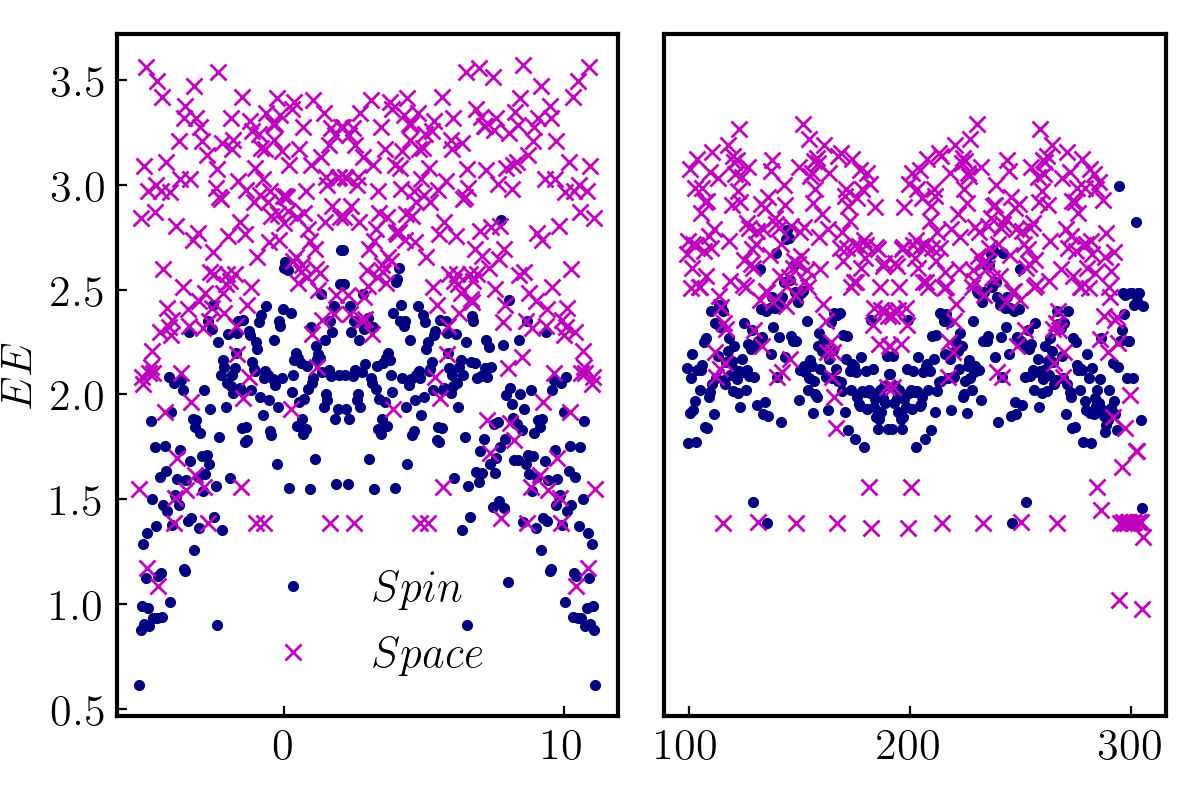

In [97]:
######### excited spectrum
basis = np.genfromtxt('data/hilbert_space_lattice0302OO_filling0303.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

basisUp, basisDown = [], []
indexDictSpin = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configUp, configDown = config[:numSite], config[numSite:]
    if configUp not in basisUp:
        basisUp.append(configUp)
    if configDown not in basisDown:
        basisDown.append(configDown)
    indexDictSpin.append([basisUp.index(configUp), basisDown.index(configDown)])
#     print(basisUp.index(configUp), basisDown.index(configDown), indexDict[i][1])

dimUp, dimDown = len(basisUp), len(basisDown)
print(dimUp, dimDown)

# Spatial entanglement.
basisL, basisR = [], []
indexDictSpace = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configL = config[:int(numSite/2)]+config[numSite:numSite+int(numSite/2)]
    configR = config[int(numSite/2):numSite]+config[numSite+int(numSite/2):]
    if configL not in basisL:
        basisL.append(configL)
    if configR not in basisR:
        basisR.append(configR)
    indexDictSpace.append([basisL.index(configL), basisR.index(configR)])

dimL, dimR = len(basisL), len(basisR)
print(dimL, dimR)

numEval =360
eigVecFile = 'data/eigenvectors360_lattice0302OO_filling0303_U2.0_step2.0_num100.dat'
waveFunc = LoadEigVec(eigVecFile)
eigValsFile = 'data/eigenvalues360_lattice0302OO_filling0303_U2.0_step2.0_num100.dat'
spec = LoadEigVal(eigValsFile)

figEE = plt.figure(figsize=(6, 4))
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

sam = 0
x = np.linspace(spec[sam][0], spec[sam][numEval-1], num=numEval, endpoint=False)
EESpin = np.zeros((numEval), dtype=np.float)
EESpace = np.zeros((numEval), dtype=np.float)
for l in range(numEval):
    wf = waveFunc[sam][l]
    EESpin[l] = EntanglementEntropySpin(wf)
    EESpace[l] = EntanglementEntropySpace(wf)

ax0 = figEE.add_subplot(121)
ax0.plot(x, EESpin, color='navy', linestyle='none', marker='.', label='$Spin$')
ax0.plot(x, EESpace, color='m', linestyle='none', marker='x', label='$Space$')
ax0.legend(frameon=False, fontsize=fsize)
ax0.tick_params(axis='both', labelsize=fsize, direction='in')
ax0.set_ylabel('$EE$', fontsize=fsize)

sam = 50
x = np.linspace(spec[sam][0], spec[sam][numEval-1], num=numEval, endpoint=False)
EESpin = np.zeros((numEval), dtype=np.float)
EESpace = np.zeros((numEval), dtype=np.float)
for l in range(numEval):
    wf = waveFunc[sam][l]
    EESpin[l] = EntanglementEntropySpin(wf)
    EESpace[l] = EntanglementEntropySpace(wf)

ax1 = figEE.add_subplot(122, sharey=ax0)
ax1.axes.get_yaxis().set_visible(False)
ax1.plot(x, EESpin, color='navy', linestyle='none', marker='.', label='$Spin$')
ax1.plot(x, EESpace, color='m', linestyle='none', marker='x', label='$Space$')
# ax1.legend(frameon=False, fontsize=fsize)
ax1.tick_params(axis='both', labelsize=fsize, direction='in')

figEE.tight_layout()
figEE.savefig('EE.pdf', format='PDF')

In [155]:
#########

basis = np.genfromtxt('data/hilbert_space_lattice0302OO_filling0302.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

basisUp, basisDown = [], []
indexDictSpin = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configUp, configDown = config[:numSite], config[numSite:]
    if configUp not in basisUp:
        basisUp.append(configUp)
    if configDown not in basisDown:
        basisDown.append(configDown)
    indexDictSpin.append([basisUp.index(configUp), basisDown.index(configDown)])
#     print(basisUp.index(configUp), basisDown.index(configDown), indexDict[i][1])

dimUp, dimDown = len(basisUp), len(basisDown)
print(dimUp, dimDown)

# Spatial entanglement.
basisL, basisR = [], []
indexDictSpace = []
for i in range(dim):
    s = basis[i]
    b = bin(s)[2:]
    config = b.rjust(numSite*2, '0')
    config = config[::-1]
    configL = config[:int(numSite/2)]+config[numSite:numSite+int(numSite/2)]
    configR = config[int(numSite/2):numSite]+config[numSite+int(numSite/2):]
    if configL not in basisL:
        basisL.append(configL)
    if configR not in basisR:
        basisR.append(configR)
    indexDictSpace.append([basisL.index(configL), basisR.index(configR)])

dimL, dimR = len(basisL), len(basisR)
print(dimL, dimR)

numEval =270
eigVecFile = 'data/eigenvectors270_lattice0302OO_filling0302_U2.0_step2.0_num100.dat'
waveFunc = LoadEigVec(eigVecFile)
eigValsFile = 'data/eigenvalues270_lattice0302OO_filling0302_U2.0_step2.0_num100.dat'
spec1 = LoadEigVal(eigValsFile)

figEE = plt.figure(figsize=(8, 4))
mpl.rcParams['axes.linewidth'] = 1.0
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

sam = 0
x = np.linspace(spec[sam][0], spec[sam][numEval-1], num=numEval, endpoint=False)
EESpin = np.zeros((numEval), dtype=np.float)
EESpace = np.zeros((numEval), dtype=np.float)
for l in range(numEval):
    wf = waveFunc[sam][l]
    EESpin[l] = EntanglementEntropySpin(wf)
    EESpace[l] = EntanglementEntropySpace(wf)

ax2 = figEE.add_subplot(121)
ax2.plot(x, EESpin, color='navy', linestyle='none', marker='.', label='$Spin$')
ax2.plot(x, EESpace, color='m', linestyle='none', marker='x', label='$Space$')
ax2.legend(frameon=False, fontsize=fsize)
ax2.tick_params(axis='both', labelsize=fsize, direction='in')
ax2.set_ylabel('$EE$')

sam = 25
x = np.linspace(spec[sam][0], spec[sam][numEval-1], num=numEval, endpoint=False)
EESpin = np.zeros((numEval), dtype=np.float)
EESpace = np.zeros((numEval), dtype=np.float)
for l in range(numEval):
    wf = waveFunc[sam][l]
    EESpin[l] = EntanglementEntropySpin(wf)
    EESpace[l] = EntanglementEntropySpace(wf)
    
ax3 = figEE.add_subplot(122)
ax3.plot(x, EESpin, color='navy', linestyle='none', marker='.', label='$Spin$')
ax3.plot(x, EESpace, color='m', linestyle='none', marker='x', label='$Space$')
ax3.legend(frameon=False, fontsize=fsize)
ax3.tick_params(axis='both', labelsize=fsize, direction='in')
ax3.set_ylabel('$EE$')

figEE.savefig('EE_half_filled.pdf', format='PDF')

OSError: data/hilbert_space_lattice0302OO_filling0302.txt not found.

\section{Nagaoka state}

\subsection{Review on Nagaoka's theorem}

\subsection{Transverse spin component}
Spin operator is defined as

\begin{equation}
\mathbf{S}_{i}=\frac{1}{2}F_{i}^{\dagger}\mathbf{\sigma}F_{i}, F_{i}=(c_{i\uparrow}, c_{i\downarrow})^{T}.
\end{equation}

Total $S^{z}=\frac{1}{2}\sum_{i}S_{i}^{z}=\sum_{i}(n_{i\uparrow}-n_{i\downarrow})$ is conserved. $\mathbf{S}^{2}=(S^{z})^{2}+\frac{1}{2}(S^{+}S^{-}+S^{-}S^{+})$, where $S^{+}=(S^{-})^{\dagger}=\sum_{i}c_{i\uparrow}^{\dagger}c_{i\downarrow}$. We would like to measure the quantity $(S^{T})^{2}=\frac{1}{2}(S^{+}S^{-}+S^{-}S^{+})$. Specifically we would like to compute

\begin{equation}
\begin{aligned}
{S^{-}S^{+}}|\psi\rangle
&=\sum_{i,j}c_{i\downarrow}^{\dagger}c_{i\uparrow}c_{j\uparrow}^{\dagger}c_{j\downarrow}|\psi\rangle=\sum_{\alpha}c_{\alpha}\left(\sum_{i,j}c_{i\downarrow}^{\dagger}c_{i\uparrow}c_{j\uparrow}^{\dagger}c_{j\downarrow}\right)|\alpha\rangle \\
&=\sum_{\alpha}c_{\alpha}\left(\sum_{i,j}c_{i\downarrow}^{\dagger}c_{j\downarrow}c_{i\uparrow}c_{j\uparrow}^{\dagger}\right)|\alpha\rangle \\
&=\sum_{\alpha}c_{\alpha}\left[\sum_{i}(n_{i\downarrow}-n_{i\downarrow}n_{i\uparrow})-\sum_{i\neq j}c_{i\downarrow}^{\dagger}c_{j\downarrow}c_{j\uparrow}^{\dagger}c_{i\uparrow}\right]|\alpha\rangle.
\end{aligned}
\end{equation}





In [8]:
numSiteX = 4
numSiteY = 2
numSite = numSiteX*numSiteY

numSite = 8
numSam = 200
numEval = 20

# The returned eigVec[i][j] gives the ith sample's jth eigvector with dimesion dim.
def LoadEigVec(f):
    rawData = np.fromfile(f, dtype=np.float)
    temp = np.reshape(rawData, (numSam, numEval, dim, 2))
    eigVec = np.array(temp[..., 0], dtype=complex)
    eigVec.imag = temp[..., 1]
    return eigVec

def SZDensity(wf, i, j):
    k = j*numSiteX+i
    temp = np.zeros(dim, dtype=complex)
    for l in range(dim):
        s = basis[l]
        b = bin(s)[2:]
        config = b.rjust(numSite*2, '0')
        config = config[::-1]
        configUp, configDown = config[:numSite], config[numSite:]
        temp[l] = 0.5*(int(configUp[k])-int(configDown[k]))*wf[l]
    return temp

def SZDensityTotal(wf):
    szProfile = np.zeros((numSiteX, numSiteY), dtype=float)
    for i in range(numSiteX):
        for j in range(numSiteY):
            r = np.vdot(wf, SZDensity(wf, i, j))
            szProfile[i][j] = np.real(r)
    return szProfile

def ParticleDensity(wf, i, j):
    k = j*numSiteX+i
    temp = np.zeros(dim, dtype=complex)
    for l in range(dim):
        s = basis[l]
        b = bin(s)[2:]
        config = b.rjust(numSite*2, '0')
        config = config[::-1]
        configUp, configDown = config[:numSite], config[numSite:]
        temp[l] = 0.5*(int(configUp[k])+int(configDown[k]))*wf[l]
    return temp

def ParticleDensityTotal(wf):
    parProfile = np.zeros((numSiteX, numSiteY), dtype=float)
    for i in range(numSiteX):
        for j in range(numSiteY):
            r = np.vdot(wf, ParticleDensity(wf, i, j))
            parProfile[i][j] = np.real(r)
    return parProfile

def SZSZ(wf, i, j, ii, jj):
    k = j*numSiteX+i
    kk = jj*numSiteX+ii
    temp = np.zeros(dim, dtype=complex)
    for l in range(dim):
        s = basis[l]
        b = bin(s)[2:]
        config = b.rjust(numSite*2, '0')
        config = config[::-1]
        configUp, configDown = config[:numSite], config[numSite:]
        temp[l] = 0.25*(int(configUp[k])-int(configDown[k]))*(int(configUp[kk])-int(configDown[kk]))*wf[l]
    return temp

def SZSZTotal(wf):
    szszTotal = np.zeros((numSiteX, numSiteY), dtype=float)
    for i in range(numSiteX):
        for j in range(numSiteY):
            r = np.vdot(wf, SZSZ(wf, 0, 0, i, j))
            szszTotal[i][j] = np.real(r)
    return szszTotal


<IPython.core.display.Javascript object>


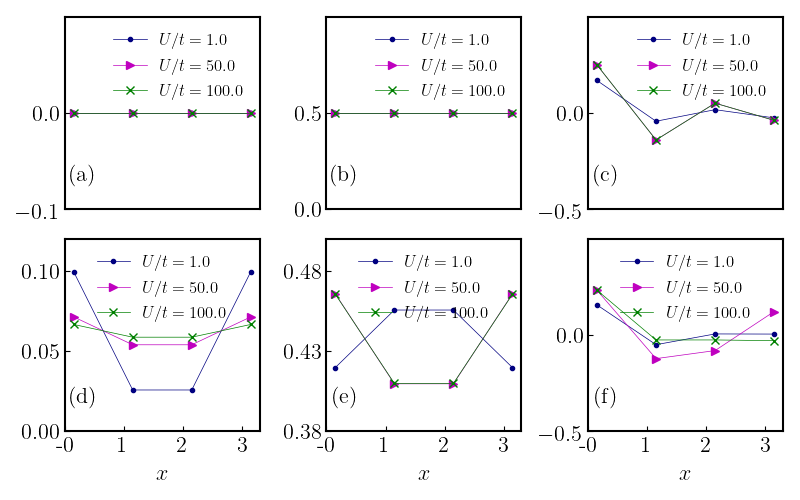

4900
one hole
3920


In [13]:
figProfile = plt.figure(figsize=(8, 5))
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

basis = np.genfromtxt('data/hilbert_space_lattice0402OO_filling0404.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

eigVecFile = 'data/eigenvectors20_lattice0402OO_filling0404_U1.0_step1.0_num200.dat'
waveFunc = LoadEigVec(eigVecFile)

x = [0, 1, 2, 3]

ax0 = figProfile.add_subplot(231)
ax0.set_title(r'(a)', x=0.1, y=0.1, fontsize=fsize)
ax0.set_ylim(-0.1, 0.1)

wf=waveFunc[1][0]
szPro=SZDensityTotal(wf)
ax0.plot(x, szPro[:, 0],
         color='navy', linestyle='-', linewidth=0.5, marker='.', label='$U/t=1.0$')
wf=waveFunc[50][0]
szPro=SZDensityTotal(wf)
ax0.plot(x, szPro[:, 0], color='m', linestyle='-', linewidth=0.5, marker='>', label='$U/t=50.0$')
wf=waveFunc[100][0]
szPro=SZDensityTotal(wf)
ax0.plot(x, szPro[:, 0], color='green', linestyle='-', linewidth=0.5, marker='x', label='$U/t=100.0$')

ax0.tick_params(axis='both', labelsize=fsize, direction='in')
ax0.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1.0f'))
ax0.legend(frameon=False, fontsize=12)
start, end = ax0.get_ylim()
ax0.yaxis.set_ticks(np.arange(start, end, 0.1))
ax0.axes.get_xaxis().set_visible(False)

##################

ax1 = figProfile.add_subplot(232)
ax1.set_title(r'(b)', x=0.1, y=0.1, fontsize=fsize)
ax1.set_ylim(0.0, 1.0)

wf=waveFunc[1][0]
parPro=ParticleDensityTotal(wf)
ax1.plot(x, parPro[:, 0], color='navy', linestyle='-', linewidth=0.5, marker='.', label='$U/t=1.0$')
wf=waveFunc[50][0]
parPro=ParticleDensityTotal(wf)
ax1.plot(x, parPro[:, 0], color='m', linestyle='-', linewidth=0.5, marker='>', label='$U/t=50.0$')
wf=waveFunc[100][0]
parPro=ParticleDensityTotal(wf)
ax1.plot(x, parPro[:, 0], color='green', linestyle='-', linewidth=0.5, marker='x', label='$U/t=100.0$')

ax1.tick_params(axis='both', labelsize=fsize, direction='in')
ax1.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1.0f'))
ax1.legend(frameon=False, fontsize=12)
start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(start, end, 0.5))
ax1.axes.get_xaxis().set_visible(False)

###################

ax2 = figProfile.add_subplot(233)
ax2.set_title(r'(c)', x=0.1, y=0.1, fontsize=fsize)
ax2.set_ylim(-0.5, 0.5)

wf=waveFunc[1][0]
szszPro=SZSZTotal(wf)
ax2.plot(x, szszPro[:, 0], color='navy', linestyle='-', linewidth=0.5, marker='.', label='$U/t=1.0$')
wf=waveFunc[50][0]
szszPro=SZSZTotal(wf)
ax2.plot(x, szszPro[:, 0], color='m', linestyle='-', linewidth=0.5, marker='>', label='$U/t=50.0$')
wf=waveFunc[100][0]
szszPro=SZSZTotal(wf)
ax2.plot(x, szszPro[:, 0], color='green', linestyle='-', linewidth=0.5, marker='x', label='$U/t=100.0$')

ax2.tick_params(axis='both', labelsize=fsize, direction='in')
ax2.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1.0f'))
ax2.legend(frameon=False, fontsize=12)
start, end = ax2.get_ylim()
ax2.yaxis.set_ticks(np.arange(start, end, 0.5))
ax2.axes.get_xaxis().set_visible(False)

###################
print('one hole')

basis = np.genfromtxt('data/hilbert_space_lattice0402OO_filling0403.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

eigVecFile = 'data/eigenvectors20_lattice0402OO_filling0403_U1.0_step1.0_num200.dat'
waveFunc = LoadEigVec(eigVecFile)

ax3 = figProfile.add_subplot(234, sharex=ax0)
ax3.set_title(r'(d)', x=0.1, y=0.1, fontsize=fsize)
ax3.set_ylim(0.0, 0.12)

wf=waveFunc[1][0]
szPro=SZDensityTotal(wf)
ax3.plot(x, szPro[:, 0], color='navy', linestyle='-', linewidth=0.5, marker='.', label='$U/t=1.0$')
wf=waveFunc[50][0]
szPro=SZDensityTotal(wf)
ax3.plot(x, szPro[:, 0], color='m', linestyle='-', linewidth=0.5, marker='>', label='$U/t=50.0$')
wf=waveFunc[100][0]
szPro=SZDensityTotal(wf)
ax3.plot(x, szPro[:, 0], color='green', linestyle='-', linewidth=0.5, marker='x', label='$U/t=100.0$')

ax3.set_xlabel('$x$', fontsize=fsize)
ax3.tick_params(axis='both', labelsize=fsize, direction='in')
ax3.legend(frameon=False, fontsize=12)
start, end = ax3.get_xlim()
ax3.xaxis.set_ticks(np.arange(start, end, 1))
start, end = ax3.get_ylim()
ax3.yaxis.set_ticks(np.arange(start, end, 0.05))

##########

ax4 = figProfile.add_subplot(235, sharex=ax1)
ax4.set_title(r'(e)', x=0.1, y=0.1, fontsize=fsize)
ax4.set_ylim(0.38, 0.5)

wf=waveFunc[1][0]
parPro=ParticleDensityTotal(wf)
ax4.plot(x, parPro[:, 0], color='navy', linestyle='-', linewidth=0.5, marker='.', label='$U/t=1.0$')
wf=waveFunc[50][0]
parPro=ParticleDensityTotal(wf)
ax4.plot(x, parPro[:, 0], color='m', linestyle='-', linewidth=0.5, marker='>', label='$U/t=50.0$')
wf=waveFunc[100][0]
parPro=ParticleDensityTotal(wf)
ax4.plot(x, parPro[:, 0], color='green', linestyle='-', linewidth=0.5, marker='x', label='$U/t=100.0$')

ax4.set_xlabel('$x$', fontsize=fsize)
ax4.tick_params(axis='both', labelsize=fsize, direction='in')
# ax4.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1.0f'))
ax4.legend(frameon=False, fontsize=12)
start, end = ax4.get_xlim()
ax4.xaxis.set_ticks(np.arange(start, end, 1))
start, end = ax4.get_ylim()
ax4.yaxis.set_ticks(np.arange(start, end, 0.05))

###########

ax5 = figProfile.add_subplot(236, sharex=ax2)
ax5.set_title(r'(f)', x=0.1, y=0.1, fontsize=fsize)
ax5.set_ylim(-0.5, 0.5)

wf=waveFunc[1][0]
szszPro=SZSZTotal(wf)
ax5.plot(x, szszPro[:, 0], color='navy', linestyle='-', linewidth=0.5, marker='.', label='$U/t=1.0$')
wf=waveFunc[50][0]
szszPro=SZSZTotal(wf)
ax5.plot(x, szszPro[:, 0], color='m', linestyle='-', linewidth=0.5, marker='>', label='$U/t=50.0$')
wf=waveFunc[100][0]
szszPro=SZSZTotal(wf)
ax5.plot(x, szszPro[:, 0], color='green', linestyle='-', linewidth=0.5, marker='x', label='$U/t=100.0$')

ax5.set_xlabel('$x$', fontsize=fsize)
ax5.tick_params(axis='both', labelsize=fsize, direction='in')
# ax5.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%1.0f'))
ax5.legend(frameon=False, fontsize=12)
start, end = ax5.get_xlim()
ax5.xaxis.set_ticks(np.arange(start, end, 1))
start, end = ax5.get_ylim()
ax5.yaxis.set_ticks(np.arange(start, end, 0.5))
# ax2.axes.get_xaxis().set_visible(False)

figProfile.tight_layout()
figProfile.savefig('profiles.pdf', format='PDF')

3920


<IPython.core.display.Javascript object>


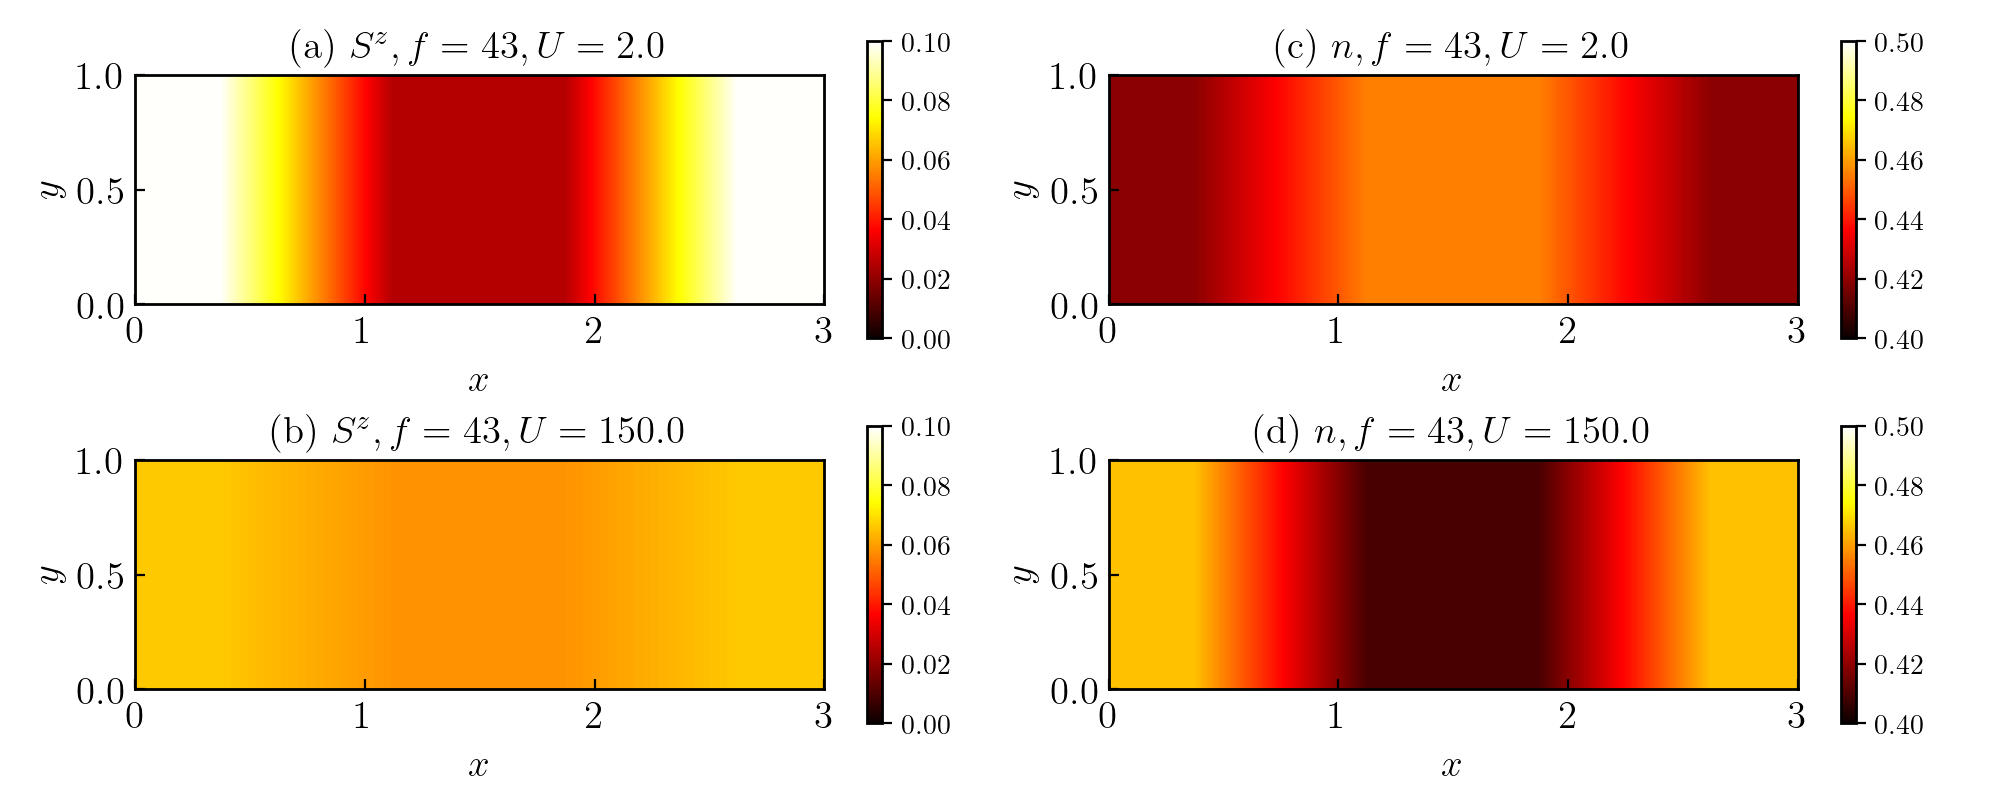

3920
[[0.09956333 0.09956333]
 [0.02543667 0.02543667]
 [0.02543667 0.02543667]
 [0.09956333 0.09956333]]
[[0.41947199 0.41947199]
 [0.45552801 0.45552801]
 [0.45552801 0.45552801]
 [0.41947199 0.41947199]]
[[0.06649298 0.06649298]
 [0.05850702 0.05850702]
 [0.05850702 0.05850702]
 [0.06649298 0.06649298]]
[[0.46545085 0.46545085]
 [0.40954915 0.40954915]
 [0.40954915 0.40954915]
 [0.46545085 0.46545085]]


In [121]:
basis = np.genfromtxt('data/hilbert_space_lattice0402OO_filling0403.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

eigVecFile = 'data/eigenvectors20_lattice0402OO_filling0403_U1.0_step1.0_num200.dat'
waveFunc = LoadEigVec(eigVecFile)

figProfile = plt.figure(figsize=(10, 4))
fsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

wf=waveFunc[1][0]
print(wf.size)
szPro=SZDensityTotal(wf)
print(szPro)
ax0 = figProfile.add_subplot(221)
ax0.set_title(r'(a) $S^{z}, f=43, U=2.0$', fontsize=fsize)
cax0 = ax0.imshow(np.transpose(szPro), interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[0, numSiteX-1, 0, numSiteY-1],
            vmax=0.0, vmin=0.1)
# vmax=np.amax(szProfile), vmin=np.amin(szProfile)
ax0.tick_params(axis='both', labelsize=fsize, direction='in')
cbar = figProfile.colorbar(cax0)

ax0.set_xlabel('$x$', fontsize=fsize)
ax0.set_ylabel('$y$', fontsize=fsize)

parPro=ParticleDensityTotal(wf)
print(parPro)
ax1 = figProfile.add_subplot(222)
ax1.set_title('(c) $n, f=43, U=2.0$', fontsize=fsize)
cax1 = ax1.imshow(np.transpose(parPro), interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[0, numSiteX-1, 0, numSiteY-1],
            vmax=0.4, vmin=0.5)
# vmax=np.amax(szProfile), vmin=np.amin(szProfile)
ax1.tick_params(axis='both', labelsize=fsize, direction='in')
cbar = figProfile.colorbar(cax1)

ax1.set_xlabel('$x$', fontsize=fsize)
ax1.set_ylabel('$y$', fontsize=fsize)

###########

wf=waveFunc[75][0]
szPro=SZDensityTotal(wf)
print(szPro)
ax2 = figProfile.add_subplot(223)
ax2.set_title(r'(b) $S^{z}, f=43, U=150.0$', fontsize=fsize)
cax2 = ax2.imshow(np.transpose(szPro), interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[0, numSiteX-1, 0, numSiteY-1],
            vmax=0.0, vmin=0.1)
# vmax=np.amax(szProfile), vmin=np.amin(szProfile)
ax2.tick_params(axis='both', labelsize=fsize, direction='in')
cbar = figProfile.colorbar(cax2)

ax2.set_xlabel('$x$', fontsize=fsize)
ax2.set_ylabel('$y$', fontsize=fsize)

parPro=ParticleDensityTotal(wf)
print(parPro)
ax3 = figProfile.add_subplot(224)
ax3.set_title('(d) $n, f=43, U=150.0$', fontsize=fsize)
cax3 = ax3.imshow(np.transpose(parPro), interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[0, numSiteX-1, 0, numSiteY-1],
            vmax=0.4, vmin=0.5)
# vmax=np.amax(szProfile), vmin=np.amin(szProfile)
ax3.tick_params(axis='both', labelsize=fsize, direction='in')
cbar = figProfile.colorbar(cax3)

ax3.set_xlabel('$x$', fontsize=fsize)
ax3.set_ylabel('$y$', fontsize=fsize)

figProfile.tight_layout()
figProfile.savefig('density_lattice0402_filling0403.pdf', format='PDF')

In [85]:
numSiteX = 3
numSiteY = 3
numSite = numSiteX*numSiteY

basis = np.genfromtxt('data/hilbert_space_lattice0303OO_filling0504.txt', delimiter=',', dtype=np.int64)
dim = basis.size
print(dim)

# The returned eigVec[i][j] gives the ith sample's jth eigvector with dimesion dim.
def LoadEigVec(f):
    rawData = np.fromfile(f, dtype=np.float)
    temp = np.reshape(rawData, (numSam, numEval, dim, 2))
    eigVec = np.array(temp[..., 0], dtype=complex)
    eigVec.imag = temp[..., 1]
    return eigVec

eigVecFile = 'data/eigenvectors20_lattice0303OO_filling0504_U0.0_step2.0_num100.dat'
waveFunc = LoadEigVec(eigVecFile)

def SZDensity(wf, i, j):
    k = j*numSiteX+i
    temp = np.zeros(dim, dtype=complex)
    for l in range(dim):
        s = basis[l]
        b = bin(s)[2:]
        config = b.rjust(numSite*2, '0')
        config = config[::-1]
        configUp, configDown = config[:numSite], config[numSite:]
        temp[l] = 0.5*(int(configUp[k])-int(configDown[k]))*wf[l]
    return temp

def SZDensityTotal(wf):
    szProfile = np.zeros((numSiteX, numSiteY), dtype=float)
    for i in range(numSiteX):
        for j in range(numSiteY):
            r = np.vdot(wf, SZDensity(wf, i, j))
            szProfile[i][j] = np.real(r)
    return szProfile

def ParticleDensity(wf, i, j):
    k = j*numSiteX+i
    temp = np.zeros(dim, dtype=complex)
    for l in range(dim):
        s = basis[l]
        b = bin(s)[2:]
        config = b.rjust(numSite*2, '0')
        config = config[::-1]
        configUp, configDown = config[:numSite], config[numSite:]
        temp[l] = 0.5*(int(configUp[k])+int(configDown[k]))*wf[l]
    return temp

def ParticleDensityTotal(wf):
    parProfile = np.zeros((numSiteX, numSiteY), dtype=float)
    for i in range(numSiteX):
        for j in range(numSiteY):
            r = np.vdot(wf, ParticleDensity(wf, i, j))
            parProfile[i][j] = np.real(r)
    return parProfile

15876


\section{Highly excited states}